In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# George's stuff

def stockReturns(cl_p, date = True):
    """
    Input:  
    cl_p: A dataframe that contains the prices of the stocks
    date: A logical argument that equals True if the first column
          in the dataframe represents dates, False otherwise
    Output: 
    A dataframe with the daily returns of the stocks - same number of
    columns as the input vector and one row less than the input vector
    """    
    if date:
        d_ret = pd.DataFrame(cl_p.iloc[1:, 0], columns=['Date'])
        j = 1
    else:
        d_ret = pd.DataFrame()
        j = 0
    for i in range(j, cl_p.shape[1]):
        d_ret[cl_p.columns[i]] = (cl_p.iloc[1:,i].values - cl_p.iloc[:-1,i].values) / cl_p.iloc[:-1,i].values
    return d_ret


def correlations(d_ret):
    """
    Input:  
    d_ret: A dataframe with the daily returns of the stocks - The 
           first column can either indicate dates or not
    Output: 
    A list of tuples. Each tuple in the list have 3 elements:
    1. The correlation between two firms
    2 and 3. The firms for which we compute the correlation
    """
    cor = d_ret.corr()
    n = int(cor.shape[0])
    cor_list = []
    for i in range(1, n):
        for j in range(0, i):
            cor_list.append((cor.iloc[i, j], cor.columns.values[i], cor.columns.values[j]))
    return cor_list
    
    
def sortCorrs(cor_list): 
    """
    Input:  
    cor_list: A list of tuples. Each tuple in the list have 3 elements:
              1. The correlation between two firms
              2. and 3. The firms for which we compute the correlation
    Output: 
    The same list of tuples ordered based on the first element of the
    tuples, e.g. the correlations
    """
    return sorted(cor_list, reverse = True)


def clusteringAlg(ord_list, k = 0):
    """
    Input:  
    ord_list: The ordered list of tuples which include the
              correlations between firms and the firms themselves
    k: The number of iterations for the clustering algorithm
    Output: 
    A list of sets where each set represents an individual 
    cluster
    """
    # Initialize the list of sets. Each set represents a cluster
    # which initialy includes only one firm
    sets = []
    for i in range(len(ord_list)):
        if not({ord_list[i][1]} in sets):
            sets.append({ord_list[i][1]})
        if not({ord_list[i][2]} in sets):
            sets.append({ord_list[i][2]}) 
    
    # Repeat the algorithm k times
    # In each iteration we check the k-th tuple of correlations list
    # and whether the 2 firms in that tuple are already in the same
    # set. If they do, we move on to the next tuple, otherwise we merge
    for j in range(min(k, len(ord_list))):
        nd1 = ord_list[j][1]
        nd2 = ord_list[j][2]
        fl1, fl2 = False, False    
        for i in range(len(sets)):
            if (nd1 in sets[i]) and fl1 == False:
                idx1 = i
                fl1 = True
            if (nd2 in sets[i]) and fl2 == False:
                idx2 = i
                fl2 = True
        if idx1 != idx2:
            sets[idx1] = sets[idx1].union(sets[idx2])
            sets.remove(sets[idx2])
        print(len(sets))
    # Return the final list of sets
    return sets


def findCor(cl_p, f1, f2):
    """
    Input:
    cl_p: A dataframe that contains the prices of the stocks
    f1, f2: The abreviations of the firms for which we want to 
            calculate the correlation
    Output: 
    The correlation of the two firms
    """
    df = stockReturns(cl_p.loc[:, [f1, f2]], date = False)
    return df.corr().iloc[1, 0]


def plotSetPrices(cl_p, sets):
    """
    Description:
    Plots the stock prices of a set of firms that belong to the same
    cluster
    Input:
    cl_p: A dataframe that contains the prices of the stocks
    sets: A set that contains all the names of the firms that belong
          at the same cluster
    """
    df = cl_p.loc[:, sets]
    df.set_index(cl_p.loc[:, 'Date'])
    plt.figure();         
    df.plot();

In [4]:
# Steven's stuff

def extract_clusters(list_of_sets):
    '''
    input: clusters from evaluation of clustering algorithm
    output: extract all clusters longer than 1 for evaluation of clusters
    '''
    
    extracted_sets = []
    
    for item in list_of_sets:
            if len(item) > 1:   # extract all sets that have more than one element
                extracted_sets.append(item)
    
    return extracted_sets
    
   
   
def mean_of_list(list):
    '''
    input: list of numbers
    output: mean of these numbers
    '''
    sum = 0
    
    for item in list:
        sum += item
        
    mean = sum / len(list)
    
    return mean
        
    
    
def name_columns(dataframe):
    '''
    input: takes dataframe with average means and returns of clusters as input
    output: returns dataframe with 'Cluter 1, Cluster 2,...' names
    '''
    
    colnames = []
    
    for i in range(len(dataframe.columns)):
        name = 'Cluster ' + str(i + 1)
        colnames.append(name)
        
    dataframe.columns = colnames
    return dataframe
    
    
    
    
def evaluate_clusters(list_of_sets):
    '''
    input: uses a list of clusters
    output: average return and average risk of given cluster
    
    '''
    
    dframe = pd.DataFrame()   # initialize empty dataframe
    
    count = 0   # used to populate columns of dataframe
    
    mean_dframe = dailyReturns.mean()   # creates a dataframe with expected returns for all stocks
    sd_frame = dailyReturns.std()   # creates a dataframe with starndard deviations for all stocks
    
    for set in list_of_sets:
        
        iterable_set = list(set)   # turns tuple into list to be able to iterate over it
        
        mean = []   # list of expected returns for a given cluster
        sd = []   # list of standard deviations for a given cluster
        
        for stock in iterable_set:
            mean.append(mean_dframe[stock])
            sd.append(sd_frame[stock])
        
        mean_cluster = mean_of_list(mean)   #
        sd_cluster = mean_of_list(sd)
        
        dframe[count] = [mean_cluster, sd_cluster]
        
        count += 1
        
    dframe.index = ['Average Return', 'Average Risk']
    name_columns(dframe)   # gives each column the appropriate name (Cluster 1, Cluster 2,...)
        
    return dframe
        
        
        
def risk_analysis(evaluted_cluster_dframe):
    """ input: table of clusters
        output: plot to asses risk / return of clusters
        note: gets a little crowded with more than 5 clusters
    """

    area = np.pi * 3
    
    plt.figure(figsize = (8,6))
    plt.scatter(evaluted_cluster_dframe.loc['Average Return'], evaluted_cluster_dframe.loc['Average Risk'], s = area)
    plt.xlabel('Expected return')
    plt.ylabel('Risk')
    
    for label,x,y in zip(evaluted_cluster_dframe.columns, evaluted_cluster_dframe.loc['Average Return'], evaluted_cluster_dframe.loc['Average Risk']):
        plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=0.5'))
        
    

In [5]:
!pwd

/Users/Steven/Google Drive/Imperial College London/Term 1/Data Structures and Algorithms/Final project/StockClustering_Project


In [6]:
priceDF = pd.read_csv('SP_500_close_2015.csv')

In [7]:
dailyReturns = stockReturns(priceDF)

In [8]:
corrs = correlations(dailyReturns)

In [9]:
corrs = sortCorrs(corrs)

In [18]:
clust = clusteringAlg(corrs, 10)

495
494
493
492
491
490
489
488
487
486


In [19]:
# extract all the relevent clusters
clust = extract_clusters(clust)

In [20]:
# evaluate the clusters 
dframe = evaluate_clusters(clust)

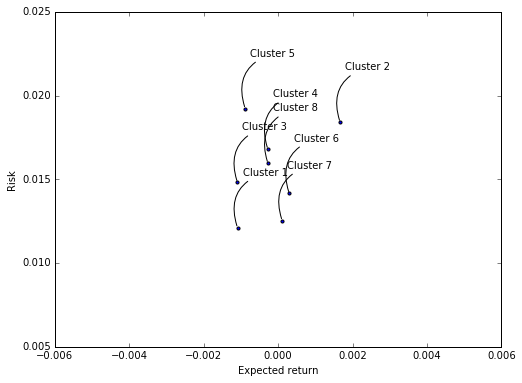

In [23]:
risk_analysis(dframe)

# evaluates clusters of algorithm on a risk / return basis